### Credit Card Transactions Fraud Detection Dataset

##### About Data Set:

````
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

````

#### Import Libraries 

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#### Load Dataset

In [2]:
df1_1 = pd.read_csv("fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

frames = [df1_1, df1_2]
df1 = pd.concat(frames)
    
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df1.shape

(1852394, 22)

In [4]:
df1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038394006464.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,1309115265318020352.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


In [5]:
df1.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

#### Distribution of Dependent Column (Fraud vs Non Fraud)

In [6]:
df_fraud = df1[['is_fraud','trans_num']].groupby(['is_fraud']).count().reset_index()
df_fraud.columns = ['is_fraud','count']

df_fraud['percent'] = (df_fraud['count']/df_fraud['count'].sum())*100

df_fraud

,is_fraud,count,percent
0,0,1842743,99.478999
1,1,9651,0.521001


#### Unique Values

In [7]:
df1.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

#### Derive Variables

##### Convert "trans_date_trans_time" object to DataTime Type

In [8]:
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])

In [9]:
df1.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

##### Derive 'Transaction Hour' Feature from 'Transaction Time' Feature

In [10]:
df1['trans_hour'] = df1['trans_date_trans_time'].dt.hour
df1['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

##### Derive 'Day of Week' Feature from 'Transaction Time' Feature

In [11]:
df1['day_of_week'] = df1['trans_date_trans_time'].dt.day_name()
df1['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [12]:
df1['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [13]:
#days = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

#df1['day_of_week'] = df1['day_name'].apply(lambda x: days[x])

##### Derive 'Year Month' Feature from 'Transaction Time' Feature

In [14]:
df1['year_month'] = df1['trans_date_trans_time'].dt.to_period('M')
df1['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

In [15]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


### Cost Benefit Analysis

In [16]:
df1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038394006464.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210,12.806119
std,1309115265318020352.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992,6.815753
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000,7.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000,14.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000,19.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000,23.000000


In [17]:
df1.pivot_table(index='year_month',values='is_fraud',aggfunc=['count','sum']).describe()

,count,sum
,is_fraud,is_fraud
count,24.000000,24.000000
mean,77183.083333,402.125000
std,22822.330801,84.175444
min,47791.000000,258.000000
25%,68588.000000,339.000000
50%,71735.500000,386.000000
75%,86197.000000,457.250000
max,141060.000000,592.000000


In [18]:
df1.pivot_table(index='year_month',values='is_fraud',aggfunc=['count','sum'])

,count,sum
,is_fraud,is_fraud
year_month,,
2019-01,52525,506
2019-02,49866,517
2019-03,70939,494
2019-04,68078,376
2019-05,72532,408
2019-06,86064,354
2019-07,86596,331
2019-08,87359,382


In [43]:
round(df1.loc[df1.is_fraud==1].pivot_table(index='year_month',values='amt',aggfunc='sum').describe(),2)

,amt
count,24.000000
mean,213392.220000
std,47093.970000
min,141138.680000
25%,183611.420000
50%,203326.060000
75%,241604.380000
max,335157.540000


In [41]:
df1.loc[df1.is_fraud==1].pivot_table(index='year_month',values='amt',aggfunc='mean').describe()

,amt
count,24.000000
mean,530.415010
std,26.948415
min,481.047753
25%,514.364957
50%,528.654707
75%,545.528482
max,596.179382


In [15]:
df1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_hour                        int64
day_of_week                      object
year_month                    period[M]


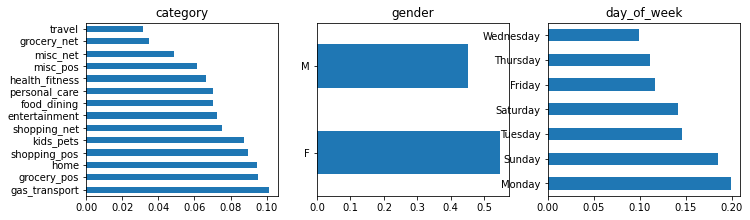

In [16]:
cat_cols=['category','gender','day_of_week']
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    df1[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

In [17]:
df1.state.value_counts(normalize=True)

TX   0.073024
NY   0.064467
PA   0.061635
CA   0.043455
OH   0.035968
MI   0.035535
IL   0.033585
FL   0.032809
AL   0.031592
MO   0.029639
MN   0.024527
AR   0.024083
NC   0.023286
VA   0.022542
WI   0.022532
SC   0.022528
KY   0.022123
IN   0.021345
IA   0.020948
OK   0.020541
MD   0.020160
GA   0.020158
WV   0.019720
NJ   0.018965
NE   0.018584
KS   0.017782
MS   0.016207
LA   0.016170
WY   0.014995
WA   0.014597
OR   0.014256
TN   0.013449
ME   0.012650
NM   0.012647
ND   0.011435
CO   0.010671
SD   0.009487
MA   0.009481
VT   0.009076
MT   0.009073
AZ   0.008293
UT   0.008290
NH   0.006331
CT   0.005927
NV   0.004350
ID   0.004338
DC   0.002769
HI   0.001970
AK   0.001600
RI   0.000402
DE   0.000005
Name: state, dtype: float64

In [18]:
df1.job.value_counts(normalize=True,ascending=False)

Film/video editor                                             0.007503
Exhibition designer                                           0.007108
Surveyor, land/geomatics                                      0.006713
Naval architect                                               0.006712
Materials engineer                                            0.006322
Designer, ceramics/pottery                                    0.006310
Environmental consultant                                      0.005924
Financial adviser                                             0.005918
Systems developer                                             0.005918
IT trainer                                                    0.005907
Copywriter, advertising                                       0.005529
Scientist, audiological                                       0.005525
Chartered public finance accountant                           0.005512
Chief Executive Officer                                       0.005506
Podiat

In [19]:
#df1.year_month.value_counts()

##### Derive Age of the Customer: 

````
Age of Customer = Trasaction Date - DOB
````

In [20]:
df1['dob'] = pd.to_datetime(df1['dob'])

In [21]:
df1['age'] = np.round((df1['trans_date_trans_time'] - df1['dob'])/np.timedelta64(1,'Y'))
df1['age']

0        31.000000
1        41.000000
2        57.000000
3        52.000000
4        33.000000
            ...   
555714   55.000000
555715   21.000000
555716   39.000000
555717   55.000000
555718   28.000000
Name: age, Length: 1852394, dtype: float64

In [22]:
df1['age'].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

#### Distribution of the amt

In [23]:
pd.concat(
[df1['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df1.loc[df1['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df1.loc[df1['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.000000,1842743.000000,9651.000000
1,mean,70.063567,67.651278,530.661412
2,std,159.253975,153.548108,391.028873
3,min,1.000000,1.000000,1.060000
4,50%,47.450000,47.240000,390.000000
5,95%,195.340000,189.590000,1084.090000
6,99.9%,1517.241050,1519.622580,1293.127000
7,max,28948.900000,28948.900000,1376.040000


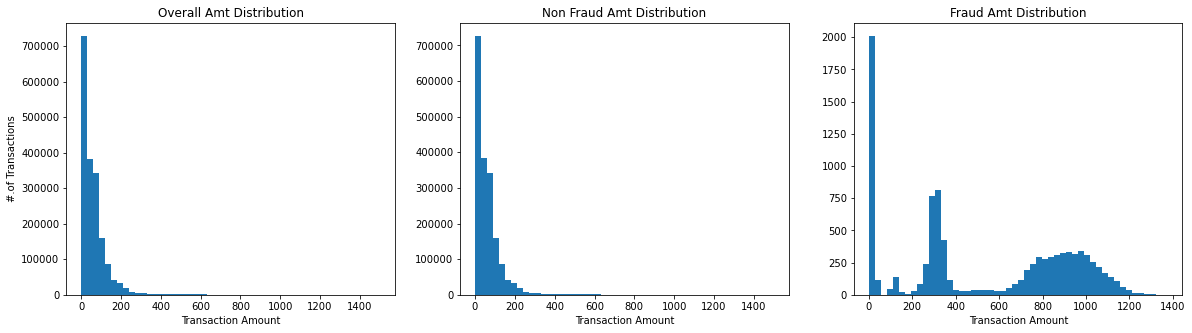

In [24]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df1[df1['amt']<=1500]['amt'], bins=50)
ax[1].hist(df1[(df1['is_fraud']==0) & (df1['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df1[(df1['is_fraud']==1) & (df1['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

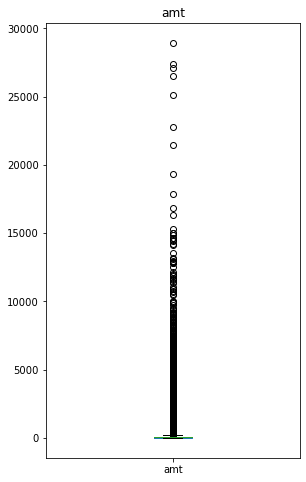

In [25]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df1[col].plot.box()
    plt.title(col)
plt.show()

````
Insight 1:

Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount

Mean of Non Fraud Transactions: 67.6
Mean of Fraud Transactions: 531.3

````

### Timeline Plots

#### Year Month vs Number of Transactions

In [246]:
df1_timeline01 = df1.groupby(df1['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df1_timeline01.columns = ['year_month','num_of_transactions','customers']
df1_timeline01.head()

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910


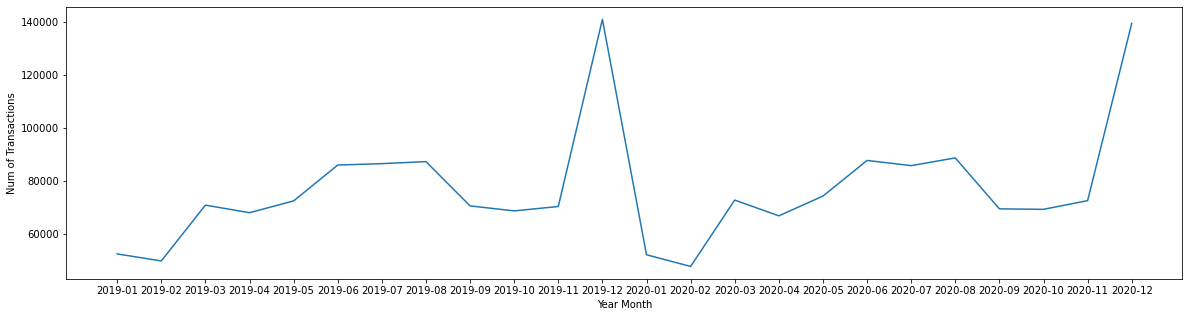

In [247]:
x = np.arange(0,len(df1_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


#### Year Month vs Number of Customers Done the Transactions

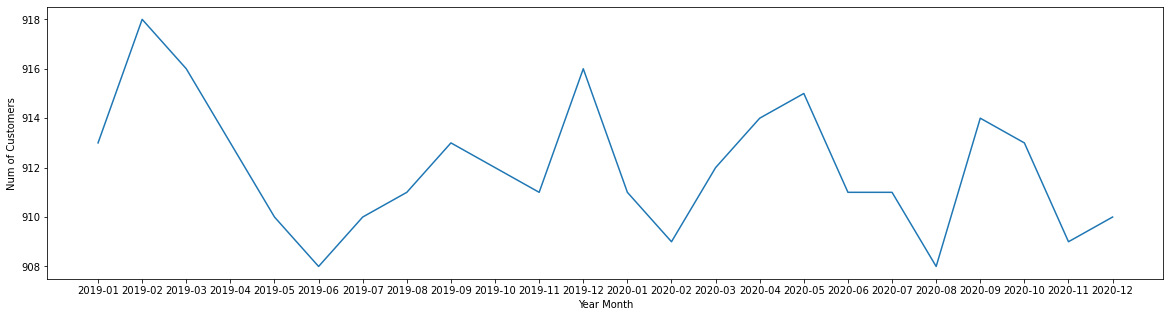

In [248]:
x = np.arange(0,len(df1_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()


#### Fraud Transactions

In [249]:
df_fraud_transactions = df1[df1['is_fraud']==1]

df1_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df1_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df1_timeline02.head()

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42


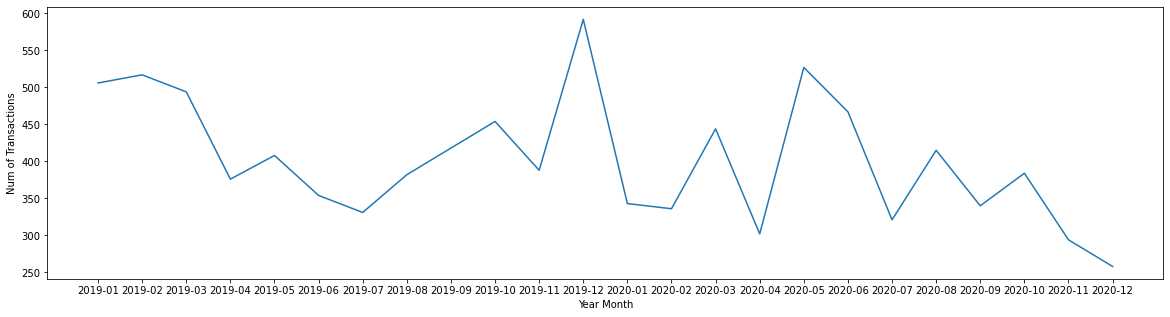

In [250]:
x = np.arange(0,len(df1_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

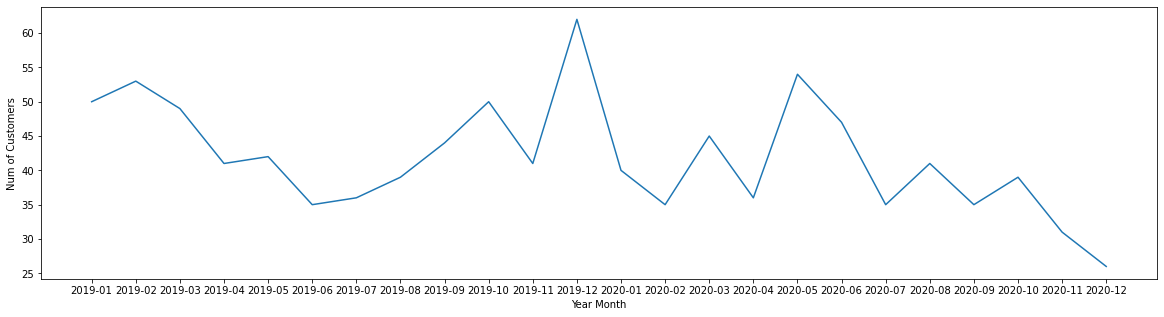

In [251]:
x = np.arange(0,len(df1_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

#### Gender

In [252]:
df_gender = df1[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


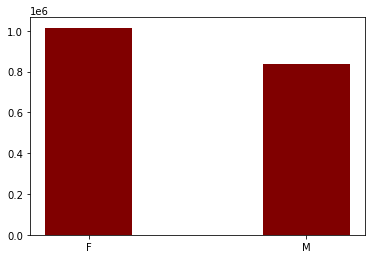

In [253]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color ='maroon',  
        width = 0.4)

plt.show()

In [254]:
df_fraud_gender = df1[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


#### Category

In [255]:
df_category = df1[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


In [256]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


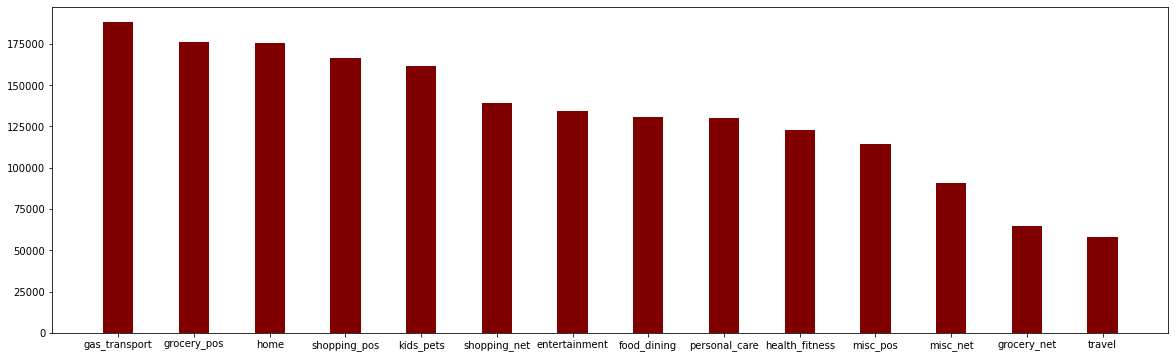

In [257]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color ='maroon',  
        width = 0.4)

plt.show()

In [258]:
df_fraud_category = df1[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
#df_fraud_category.head()

In [259]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


In [260]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


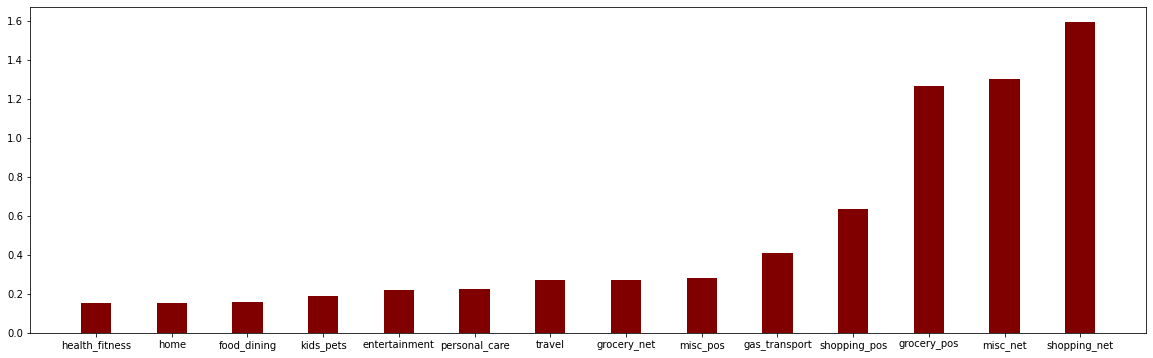

In [261]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color ='maroon',  
        width = 0.4)

plt.show()

#### Merchant

In [262]:
df1.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                             0.003380
fraud_Cormier LLC                             0.002832
fraud_Schumm PLC                              0.002804
fraud_Kuhn LLC                                0.002716
fraud_Boyer PLC                               0.002699
fraud_Dickinson Ltd                           0.002674
fraud_Emard Inc                               0.002088
fraud_Cummerata-Jones                         0.002084
fraud_Corwin-Collins                          0.002080
fraud_Rodriguez Group                         0.002075
fraud_Kling Inc                               0.002074
fraud_Erdman-Kertzmann                        0.002072
fraud_Parisian and Sons                       0.002072
fraud_Huels-Hahn                              0.002070
fraud_Stroman, Hudson and Erdman              0.002067
fraud_Kutch LLC                               0.002067
fraud_Jenkins, Hauck and Friesen              0.002061
fraud_Prohaska-Murray                         0.002056
fraud_Olso

In [263]:
df_merchant = df1[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
136,fraud_Dickinson Ltd,4953,0.267384
157,fraud_Emard Inc,3867,0.208757
117,fraud_Cummerata-Jones,3860,0.208379
107,fraud_Corwin-Collins,3853,0.208001
522,fraud_Rodriguez Group,3843,0.207461


In [264]:
df_fraud_merchant = df1[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [265]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766
1105,"fraud_Schmeler, Bashirian and Price",1,52,2788,0.150508,1.865136
691,fraud_Kuhic LLC,1,53,2842,0.153423,1.864884
563,fraud_Jast Ltd,1,51,2757,0.148834,1.849837
743,"fraud_Langworth, Boehm and Gulgowski",1,52,2817,0.152073,1.845935
1051,"fraud_Romaguera, Cruickshank and Greenholt",1,51,2767,0.149374,1.843151


#### OneHotEncoding

In [266]:
category_onehot = pd.get_dummies(df1.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df1.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df1.day_of_week, prefix='week',drop_first=True)

In [267]:
df2 = pd.concat([df1, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [268]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [269]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [270]:
df2['dist'] = \
    haversine(df2['lat'], df2['long'],
                 df2['merch_lat'], df2['merch_long'])

In [271]:
df2['dist'].describe()

count   1852394.000000
mean         76.111726
std          29.116970
min           0.022255
25%          55.320087
50%          78.216380
75%          98.509467
max         152.117173
Name: dist, dtype: float64

In [272]:
df2.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [273]:
df2.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

In [275]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','is_fraud']

In [276]:
corr = df2[cols].corr()

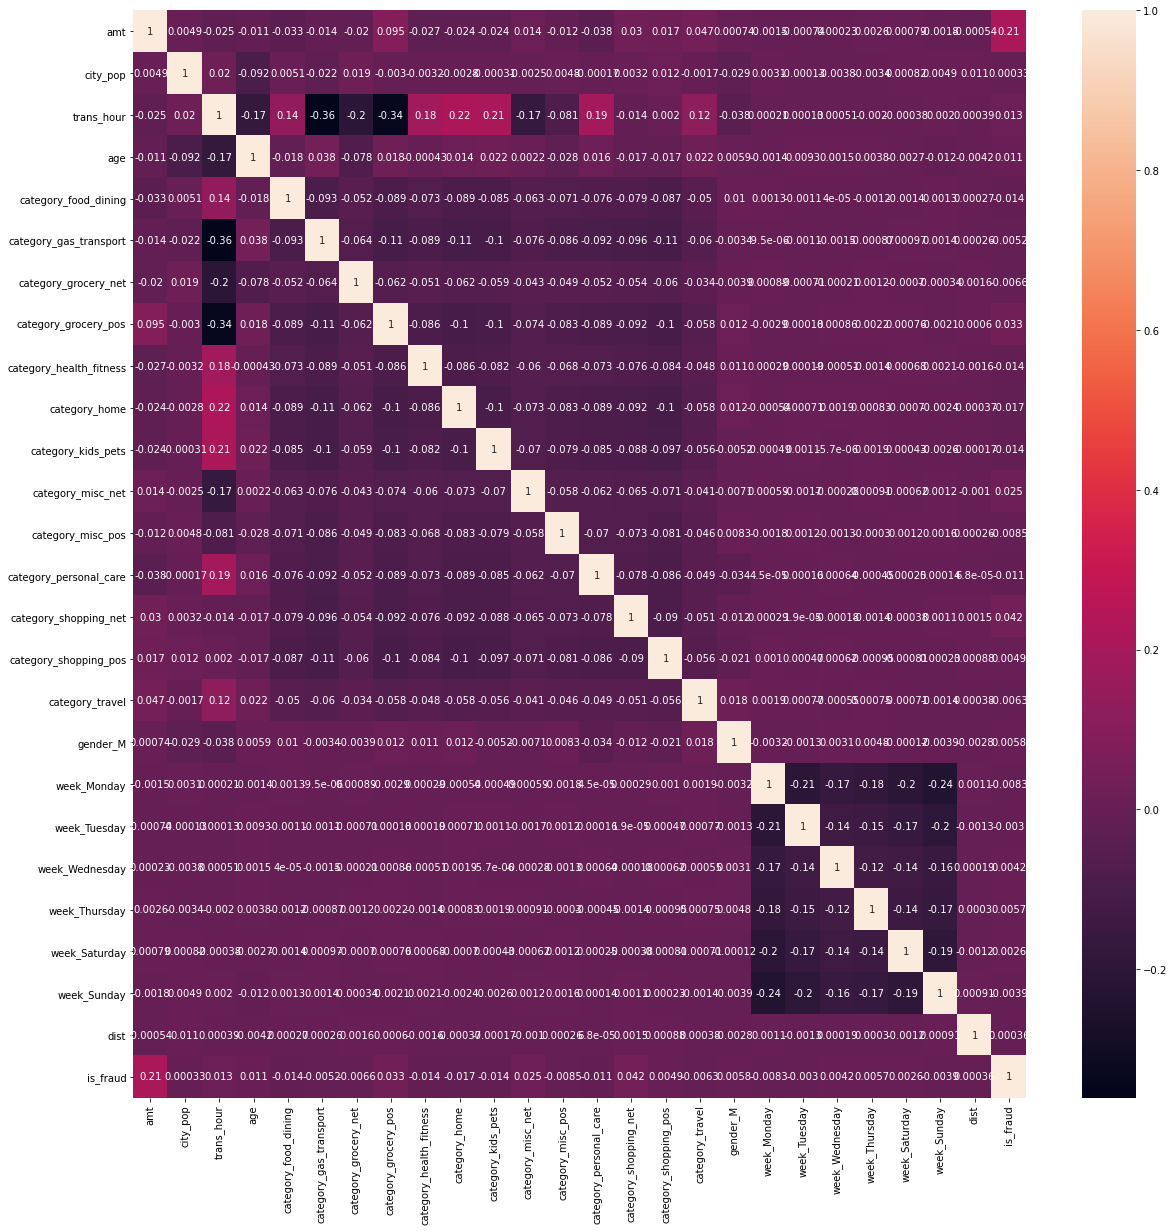

In [277]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

#### Train and Test Split

In [278]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist']

Y_cols = ['is_fraud']

In [279]:
df2_initial_train = df2.loc[(df2['trans_date_trans_time'] >= '2019-03-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-06-30 23:23:00')][cols]

#### Oversampling

In [280]:
cnt_non_fraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 0]['amt'].count()
df2_class_fraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 1]
df2_class_nonfraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 0]

In [281]:
df2_class_fraud_oversample_initial = df2_class_fraud_initial.sample(cnt_non_fraud_initial, replace=True)
df2_oversampled_initial = pd.concat([df2_class_nonfraud_initial, df2_class_fraud_oversample_initial], axis=0)

print('Random over-sampling:')
print(df2_oversampled_initial['is_fraud'].value_counts())

Random over-sampling:
1    1217587
0    1217587
Name: is_fraud, dtype: int64


In [282]:
df2_oversampled_initial[X_cols].head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,dist
102391,59.560000,965,0,37.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,85.603918
102392,81.210000,24536,0,35.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.676692
102393,196.040000,4056,0,29.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113.740798
102394,86.050000,760,0,33.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118.735914
102395,60.930000,5512,0,39.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,127.314612


#### Train and Test Split

In [283]:
X_train_initial = \
df2_oversampled_initial[X_cols]

y_train_initial = \
df2_oversampled_initial[Y_cols]

In [284]:
X_test_initial = df2[(df2['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-08-30 23:23:00')][X_cols]

y_test_initial = df2[(df2['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-08-30 23:23:00')][Y_cols]

#### Model Training

#### Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
logreg = LogisticRegression(random_state=42)

In [287]:
logreg.fit(X_train_initial, y_train_initial)

C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)

**Evaluating the model**

In [288]:
y_train_pred_initial = logreg.predict(X_train_initial)
y_test_pred_initial = logreg.predict(X_test_initial)

In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Logistic Model Train Results

In [290]:
print(confusion_matrix(y_train_initial, y_train_pred_initial))
print(classification_report(y_train_initial, y_train_pred_initial))

[[1128756   88831]
 [ 291807  925780]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86   1217587
           1       0.91      0.76      0.83   1217587

    accuracy                           0.84   2435174
   macro avg       0.85      0.84      0.84   2435174
weighted avg       0.85      0.84      0.84   2435174



#### Logistic Model Test Results

In [291]:
print(confusion_matrix(y_test_initial, y_test_pred_initial))
print(classification_report(y_test_initial, y_test_pred_initial))

[[1158413   90860]
 [   1548    4930]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1249273
           1       0.05      0.76      0.10      6478

    accuracy                           0.93   1255751
   macro avg       0.53      0.84      0.53   1255751
weighted avg       0.99      0.93      0.96   1255751



#### Decision Tree

In [292]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_initial, y_train_initial)

DecisionTreeClassifier(max_depth=20, random_state=0)

#### Decision Tree - Model Evaluation

In [293]:
print("Train Results")
pred_train_initial = dt_clf.predict(X_train_initial)

print(confusion_matrix(y_train_initial, pred_train_initial))
print(classification_report(y_train_initial, pred_train_initial))

Train Results
[[1210264    7323]
 [      0 1217587]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1217587
           1       0.99      1.00      1.00   1217587

    accuracy                           1.00   2435174
   macro avg       1.00      1.00      1.00   2435174
weighted avg       1.00      1.00      1.00   2435174



In [294]:
print("Test Results")
pred_test_initial = dt_clf.predict(X_test_initial)

print(confusion_matrix(y_test_initial, pred_test_initial))
print(classification_report(y_test_initial, pred_test_initial))

Test Results
[[1241730    7543]
 [     88    6390]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1249273
           1       0.46      0.99      0.63      6478

    accuracy                           0.99   1255751
   macro avg       0.73      0.99      0.81   1255751
weighted avg       1.00      0.99      1.00   1255751



#### Random Forest classifier - Model Training

In [295]:
from sklearn.model_selection import GridSearchCV

In [296]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

#### Grid Search - For Random Forest

In [298]:
#best_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
#best_rf.fit(X_train_initial, y_train_initial)

In [299]:
#best_rf.best_estimator_

In [300]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train_initial, y_train_initial)

<ipython-input-300-bd745524c8d6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train_initial, y_train_initial)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

#### Random Forest Classifier - Model Evaluation

In [301]:
print("Train Results")
pred_train_initial = rf_clf.predict(X_train_initial)

print(confusion_matrix(y_train_initial, pred_train_initial))
print(classification_report(y_train_initial, pred_train_initial))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.3s finished


[[1215212    2375]
 [      0 1217587]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217587
           1       1.00      1.00      1.00   1217587

    accuracy                           1.00   2435174
   macro avg       1.00      1.00      1.00   2435174
weighted avg       1.00      1.00      1.00   2435174



In [302]:
print("Test Results")
pred_test_initial = rf_clf.predict(X_test_initial)

print(confusion_matrix(y_test_initial, pred_test_initial))
print(classification_report(y_test_initial, pred_test_initial))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.2s finished


[[1246780    2493]
 [    101    6377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1249273
           1       0.72      0.98      0.83      6478

    accuracy                           1.00   1255751
   macro avg       0.86      0.99      0.91   1255751
weighted avg       1.00      1.00      1.00   1255751



#### XGBoost - Model Training

In [303]:
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train_initial, y_train_initial)

xbt_model.fit(X_train_initial, y_train_initial)

C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[21:05:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

#### XGBoost - Model Evaluation

#### Train Results

In [304]:
pred_train_initial = xbt_model.predict(X_train_initial)

In [305]:
from sklearn.metrics import classification_report,confusion_matrix

In [306]:
print(confusion_matrix(y_train_initial, pred_train_initial))
print(classification_report(y_train_initial, pred_train_initial))

[[1184254   33333]
 [  47257 1170330]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97   1217587
           1       0.97      0.96      0.97   1217587

    accuracy                           0.97   2435174
   macro avg       0.97      0.97      0.97   2435174
weighted avg       0.97      0.97      0.97   2435174



#### Test Results

In [307]:
pred_test_initial = xbt_model.predict(X_test_initial)

In [308]:
print(confusion_matrix(y_test_initial, pred_test_initial))
print(classification_report(y_test_initial, pred_test_initial))

[[1214977   34296]
 [    254    6224]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1249273
           1       0.15      0.96      0.26      6478

    accuracy                           0.97   1255751
   macro avg       0.58      0.97      0.63   1255751
weighted avg       1.00      0.97      0.98   1255751



#### Derive Historical Variables

In [309]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744


#### Orders in last 2 Months

In [310]:
df2['val_for_agg'] = 1

#### 60 Day Transactions by Customers

In [311]:
df_hist_trans_60d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [312]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [313]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [314]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,1.000000
2,60416207185,2019-01-03,5.000000
3,60416207185,2019-01-04,7.000000
4,60416207185,2019-01-05,9.000000


#### 24 Hours Orders by Customers

In [315]:
df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [316]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


#### 24 Hours Fraud Orders by Customers

In [317]:
df_hist_fraud_trans_24h = \
    df2[df2['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [318]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,3.000000
4,60416207185,2019-03-02 22:10:59,2.000000


#### 2 Hour Fraud Orders by Customers

In [319]:
df_hist_fraud_trans_2h = \
    df2[df2['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [320]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,1.000000
4,60416207185,2019-03-02 22:10:59,1.000000


#### 60 Day Orders Amt Avg by Customers

In [321]:
df_hist_trans_amt_avg_60d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [322]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [323]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [324]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


#### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [325]:
df2['trans_date'] = df2['trans_date_trans_time'].dt.date

In [326]:
df3 = df2.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [327]:
df3 = df3.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [328]:
df3[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df3[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [329]:
df3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [330]:
df3['hist_fraud_trans_24h'] = df3['hist_fraud_trans_24h'] - df3['hist_fraud_trans_2h']

In [331]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [332]:
corr = df3[cols].corr()

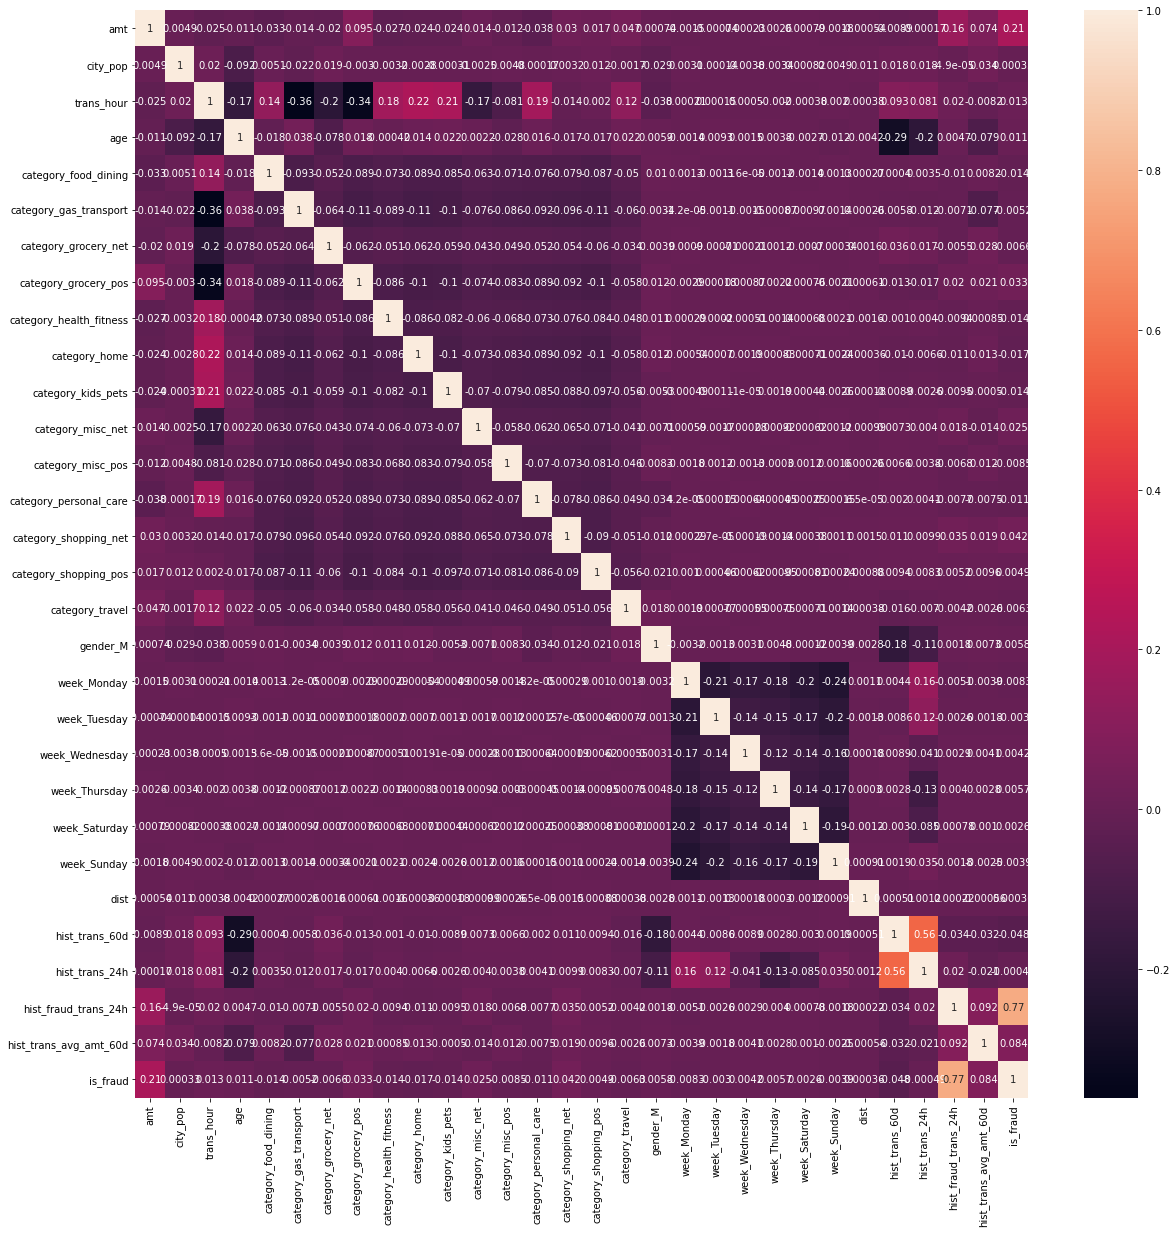

In [333]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

#### Train and Test Split

In [334]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [335]:
df3_train = df3.loc[(df3['trans_date_trans_time'] >= '2019-03-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-06-30 23:23:00')][cols]

#### Oversampling

In [336]:
cnt_non_fraud = df3_train[df3_train['is_fraud'] == 0]['amt'].count()
df3_class_fraud = df3_train[df3_train['is_fraud'] == 1]
df3_class_nonfraud = df3_train[df3_train['is_fraud'] == 0]

In [337]:
df3_class_fraud_oversample = df3_class_fraud.sample(cnt_non_fraud, replace=True)
df3_oversampled = pd.concat([df3_class_nonfraud, df3_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df3_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1217627
0    1217627
Name: is_fraud, dtype: int64


In [338]:
df3_oversampled[X_cols].head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,dist,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
102393,59.560000,965,0,37.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,85.603918,82.000000,4.000000,0.000000,95.951084
102394,81.210000,24536,0,35.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.676692,138.000000,2.000000,0.000000,88.172500
102395,196.040000,4056,0,29.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113.740798,216.000000,5.000000,0.000000,93.697523
102396,86.050000,760,0,33.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118.735914,146.000000,3.000000,0.000000,49.739178
102397,60.930000,5512,0,39.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,127.314612,230.000000,10.000000,0.000000,61.657672


#### Train and Test Split

In [339]:
X_train = \
df3_oversampled[X_cols]

y_train = \
df3_oversampled[Y_cols]

In [340]:
X_test = df3[(df3['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-08-30 23:23:00')][X_cols]

y_test = df3[(df3['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-08-30 23:23:00')][Y_cols]

#### Model Training

#### Logistic Regression

In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
logreg = LogisticRegression(random_state=42)

In [343]:
logreg.fit(X_train, y_train)

C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)

**Evaluating the model**

In [344]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [345]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Logistic Model Train Results

In [346]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1137891   79736]
 [ 291795  925832]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86   1217627
           1       0.92      0.76      0.83   1217627

    accuracy                           0.85   2435254
   macro avg       0.86      0.85      0.85   2435254
weighted avg       0.86      0.85      0.85   2435254



#### Logistic Model Test Results

In [347]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[1172880   76441]
 [   1595    4883]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1249321
           1       0.06      0.75      0.11      6478

    accuracy                           0.94   1255799
   macro avg       0.53      0.85      0.54   1255799
weighted avg       0.99      0.94      0.96   1255799



#### Decision Tree

In [348]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

#### Decision Tree - Model Evaluation

In [349]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1216105    1522]
 [      0 1217627]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217627
           1       1.00      1.00      1.00   1217627

    accuracy                           1.00   2435254
   macro avg       1.00      1.00      1.00   2435254
weighted avg       1.00      1.00      1.00   2435254



In [350]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[1247825    1496]
 [     29    6449]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1249321
           1       0.81      1.00      0.89      6478

    accuracy                           1.00   1255799
   macro avg       0.91      1.00      0.95   1255799
weighted avg       1.00      1.00      1.00   1255799



#### Random Forest classifier - Model Training

In [351]:
from sklearn.model_selection import GridSearchCV

In [352]:
from sklearn.ensemble import RandomForestClassifier

In [353]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

#### Grid Search - For Random Forest

In [354]:
best_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
best_rf.fit(X_train, y_train)

C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionW

GridSearchCV(estimator=RandomForestClassifier(random_state=345),
             param_grid={'max_depth': [8, 16, 20], 'n_estimators': [50]})

In [355]:
best_rf.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345)

In [356]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

<ipython-input-356-8fa160f0888f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 22.1min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

#### Random Forest Classifier - Model Evaluation

In [357]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.3s finished


[[1217541      86]
 [      0 1217627]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217627
           1       1.00      1.00      1.00   1217627

    accuracy                           1.00   2435254
   macro avg       1.00      1.00      1.00   2435254
weighted avg       1.00      1.00      1.00   2435254



In [358]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.6s finished


[[1249224      97]
 [     46    6432]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1249321
           1       0.99      0.99      0.99      6478

    accuracy                           1.00   1255799
   macro avg       0.99      1.00      0.99   1255799
weighted avg       1.00      1.00      1.00   1255799



#### XGBoost - Model Training

In [359]:
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

xbt_model.fit(X_train, y_train)

C:\Users\nimmy.samson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10:59:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:05:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

#### XGBoost Trees - Model Evaluation

#### Train Results

In [360]:
pred_train = xbt_model.predict(X_train)

In [361]:
from sklearn.metrics import classification_report,confusion_matrix

In [362]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1209268    8359]
 [  25233 1192394]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1217627
           1       0.99      0.98      0.99   1217627

    accuracy                           0.99   2435254
   macro avg       0.99      0.99      0.99   2435254
weighted avg       0.99      0.99      0.99   2435254



#### Test Results

In [363]:
pred_test = xbt_model.predict(X_test)

In [364]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[1240829    8492]
 [    145    6333]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1249321
           1       0.43      0.98      0.59      6478

    accuracy                           0.99   1255799
   macro avg       0.71      0.99      0.80   1255799
weighted avg       1.00      0.99      0.99   1255799

